In [43]:
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd
import os
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as ns
%matplotlib inline

In [16]:
df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'reviews_cleaned.csv'))

In [17]:
df['Review_cleaned'].head()

0    say budget really mean budget stayed double ro...
1    hotel live expectation service standard accord...
2    stayed nights got free room promotion double r...
3    located area looks little run rest singapore f...
4    ibis pearl good budget hotel geylang area room...
Name: Review_cleaned, dtype: object

In [24]:
def stem(text):
    stemmer = PorterStemmer()
    text = word_tokenize(text)
    text = [stemmer.stem(word) for word in text]
    return text 

In [28]:
tokenized_review = df['Review_cleaned'].apply(lambda x: stem(x))


In [30]:
#creating vocabulary dictionary
dictionary_review = corpora.Dictionary(tokenized_review)

#creating document term matrix
doc_term_matrix = [dictionary_review.doc2bow(rev) for rev in tokenized_review]


In [50]:
LDA = gensim.models.ldamodel.LdaModel
lda_model = LDA(corpus = doc_term_matrix,
                id2word = dictionary_review,
                num_topics = 8,
                random_state = 77,
                chunksize = 1000,
                passes = 50,
                iterations = 100)

In [54]:
lda_model.print_topics()

[(0,
  '0.048*"room" + 0.031*"small" + 0.030*"shower" + 0.019*"quay" + 0.018*"clark" + 0.015*"bathroom" + 0.015*"hotel" + 0.013*"bed" + 0.013*"toilet" + 0.013*"window"'),
 (1,
  '0.056*"hotel" + 0.028*"staff" + 0.027*"us" + 0.024*"stay" + 0.022*"front" + 0.020*"help" + 0.018*"good" + 0.016*"servic" + 0.016*"fragranc" + 0.016*"time"'),
 (2,
  '0.043*"room" + 0.016*"shower" + 0.013*"bed" + 0.013*"dont" + 0.012*"stay" + 0.011*"clean" + 0.010*"didnt" + 0.010*"small" + 0.009*"around" + 0.009*"nice"'),
 (3,
  '0.048*"place" + 0.030*"geylang" + 0.023*"local" + 0.019*"peopl" + 0.018*"home" + 0.016*"alright" + 0.015*"though" + 0.014*"fianc" + 0.013*"money" + 0.012*"fill"'),
 (4,
  '0.034*"room" + 0.019*"stay" + 0.016*"check" + 0.015*"taxi" + 0.015*"found" + 0.015*"us" + 0.013*"famili" + 0.012*"hotel" + 0.012*"airport" + 0.011*"call"'),
 (5,
  '0.038*"hotel" + 0.030*"stay" + 0.022*"room" + 0.018*"one" + 0.017*"time" + 0.013*"good" + 0.013*"bathroom" + 0.013*"night" + 0.012*"book" + 0.012*"hour"'

#### Visualizing the topics

In [52]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary_review)
vis

/Users/darrenhum/miniforge3/envs/tensorflowtest/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/darrenhum/miniforge3/envs/tensorflowtest/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/darrenhum/miniforge3/envs/tensorflowtest/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/darrenhum/miniforge3/envs/tensorflowtest/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.051050  0.010781       1        1  36.685299
6     -0.106901  0.018461       2        1  19.936383
0     -0.088699 -0.144610       3        1  12.002132
2     -0.059193 -0.239137       4        1   9.862274
1     -0.073279  0.200353       5        1   7.036579
5     -0.036877  0.106618       6        1   6.472029
4     -0.014385  0.059138       7        1   6.216715
3      0.430385 -0.011604       8        1   1.788589, topic_info=           Term         Freq        Total Category  logprob  loglift
145       place  1515.000000  1515.000000  Default  30.0000  30.0000
18        hotel  8669.000000  8669.000000  Default  29.0000  29.0000
28         room  8377.000000  8377.000000  Default  28.0000  28.0000
123     geylang   679.000000   679.000000  Default  27.0000  27.0000
194      shower  1282.000000  1282.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
147         red    44.249888   919.264680   Topic8  -4.6149   0.9900
93         area    45.281832  1379.082350   Topic8  -4.5919   0.6075
310      afford    35.946847   153.327967   Topic8  -4.8227   2.5732
1356  difficult    34.655046    83.958484   Topic8  -4.8593   3.1389
593      decent    33.873505   189.294409   Topic8  -4.8821   2.3031

[567 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
220       4  0.994277   accept
413       1  0.427698  accomod
413       5  0.566410  accomod
2123      5  0.958052  accross
310       1  0.710894   afford
...     ...       ...      ...
309       3  0.090873    would
309       5  0.018175    would
309       6  0.079766    would
953       2  0.993042  wouldnt
2825      8  0.977606     youv

[938 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 7, 1, 3, 2, 6, 5, 4])

In [53]:
coherence_model_lda = CoherenceModel(   model=lda_model,
                                        texts = tokenized_review,
                                        dictionary = dictionary_review,
                                        coherence = 'c_v')

coherence_lda = coherence_model_lda.get_coherence()
print(coherence_lda)

0.4482720768034311


In [46]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [47]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary_review,
                                                        corpus=doc_term_matrix,
                                                        texts=tokenized_review,
                                                        start=2,
                                                        limit=15,
                                                        step=1)


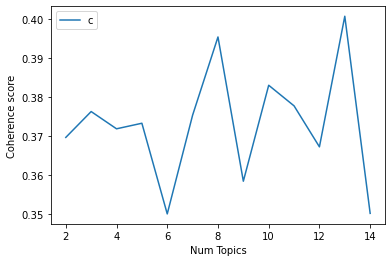

In [48]:
limit=15; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence score')
plt.legend(('coherence_values'), loc='best')
plt.show()

In [49]:
for m, cv in zip(x, coherence_values):
    print('# topics:', m, '||', 'coherence:', round(cv,2))

# topics: 2 || coherence: 0.37
# topics: 3 || coherence: 0.38
# topics: 4 || coherence: 0.37
# topics: 5 || coherence: 0.37
# topics: 6 || coherence: 0.35
# topics: 7 || coherence: 0.38
# topics: 8 || coherence: 0.4
# topics: 9 || coherence: 0.36
# topics: 10 || coherence: 0.38
# topics: 11 || coherence: 0.38
# topics: 12 || coherence: 0.37
# topics: 13 || coherence: 0.4
# topics: 14 || coherence: 0.35
